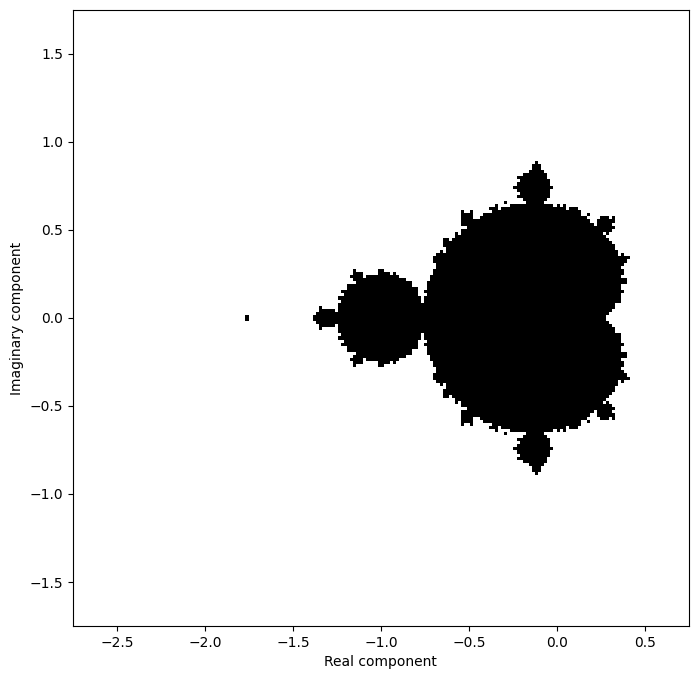

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mandelbrot_set(center = [-1,0], zoom=1, n_pixels=400, width=8, height=8):
    """ Plots the mandelbrot set with the given center, zoom, and resolution

        width, height are inches
    """
    set_map, xlim, ylim = get_set_map(center=center, zoom=zoom, n_pixels=n_pixels)
    plt.figure(figsize=(8, 8))  
    plt.imshow(set_map, cmap='binary', extent=[*xlim, *ylim]) # * unpacks e.g. xlim to x0, x1
    plt.xlabel('Real component')
    plt.ylabel('Imaginary component')
    
def get_set_map(center = [-1,0], zoom = 1, n_pixels=100, default_width=3.5):
    """ Returns the map of which points are in the Mandelbrot set,
        in the window specified by the center point and width and zoom.
        Also returns the xlim and ylim of the view.

        Note: Default width is set to show the main body of the set.
    """
    zoomed_width = default_width/zoom
    xlim = [center[0] - zoomed_width/2, center[0] + zoomed_width/2]
    ylim = [center[1] - zoomed_width/2, center[1] + zoomed_width/2]
    set_map = np.zeros(shape=[n_pixels,n_pixels]) # the set map

    for i in range(n_pixels):
        xi = xlim[0] + (xlim[1]-xlim[0]) * i/(n_pixels-1) # current x coord
        for j in range(n_pixels):
            yi = ylim[0] + (ylim[1]-ylim[0]) * j/(n_pixels-1) # current y coord
            if is_member(complex(xi, yi)):
                set_map[n_pixels-j-1,i] = 1 # columns represent the x axis; y is upside down
    return set_map, xlim, ylim

def is_member(C, escape_threshold = 10, n_iterations = 100):
    """ Returns 1 if C is member of mandelbrot set, or 0 if not
    """
    z = complex(0, 0) # Initialize z at the origin 0 + 0i

    escape_threshold = escape_threshold**2 # because we're skipping the sqrt below

    # Test if this value "escapes" within n_iterations steps
    for i in range(n_iterations):
        z = z**2 + C
        magnitude = z.real**2 + z.imag**2 # L2 norm but skip the sqrt for speed
        if magnitude > escape_threshold:
            return False
    return True

# plot the main body of the set, low resolution
plot_mandelbrot_set(center=[-1,0], zoom=1, n_pixels=200)

In [122]:
# Other explorations. Try playing with zoom, center, and resolution (n_pixels).

# Sea Horse valley
# plot_mandelbrot_set(center=[-.75,.1], zoom=20, n_pixels=800)

# Double-spiral region
# plot_mandelbrot_set(center=[-0.759856, 0.125547], zoom=20, n_pixels=400)

# Elephant valley
# plot_mandelbrot_set(center=[0.3, 0], zoom=10, n_pixels=400)

# 1/3-bulb
# plot_mandelbrot_set(center=[-0.125, 0.6495], zoom=10, n_pixels=400)

# Feigenbaum point
# plot_mandelbrot_set(center=[-1.401155,0], zoom=20, n_pixels=800)

# Mini-mandelbrot trigger point
# plot_mandelbrot_set(center=[0.370, 0.588], zoom=20, n_pixels=800)